선형 회귀를 텐서플로우와 케라스를 통해 구현

# **자동 미분**

In [1]:
import tensorflow as tf

In [2]:
# tag_gradient()는 자동 미분 기능을 수행한다.
# 임의로 2w^2 + 5라는 식을 세움

w = tf.Variable(2.)

def f(w):
  z = 2*(w**2) + 5
  return z

In [3]:
# gradients를 출력하면 w에 대한 미분값이 저장된다.
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


# **자동 미분을 이용한 선형 회귀 구현**

In [4]:
# 가중치 변수 w와 b를 선언
w = tf.Variable(4.0) # 4
b = tf.Variable(1.0) # 1

In [8]:
# 가설을 함수로 정의
@tf.function
def hypothesis(x):
  return w*x + b

In [9]:
# 임의의 입력값을 넣었을 때 결과
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [10]:
# 평균 제곱 오차를 손실 함수로 정의
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱해서 평균
  return tf.reduce_mean(tf.square(y_pred-y))

In [11]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [12]:
# 옵티마이저는 경사하강법을 사용.
# 학습률은 0.01 사용
optimizer = tf.optimizers.SGD(0.01)

In [13]:
# 300번 반복
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328163
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223597
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [14]:
# 예측값을 확인
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


# **케라스로 구현하는 선형 회귀**  
Sequential로 model이라는 이름의 모델을 만들고 그리고 add를 통해 입력과 출력 벡터의 차원과 같은 필요한 정보들을 추가한다.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [23]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [24]:
model = Sequential()

# 입력 x의 차원(input_dim)은 1. 출력 y의 차원은 1.
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation = 'linear'))

# lr = 0.01
sgd = optimizers.SGD(0.01)

# 손실함수는 mse 사용
model.compile(optimizer=sgd, loss = 'mse', metrics = ['mse'])

In [25]:
# 주어진 x와 y 데이터에 대해서 오차를 최소화하는 작업을 300번 시도
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 247ms/step - loss: 4666.8003 - mse: 4666.8003
Epoch 2/300
1/1 [==============================] - 0s 8ms/step - loss: 575.3560 - mse: 575.3560
Epoch 3/300
1/1 [==============================] - 0s 10ms/step - loss: 71.9328 - mse: 71.9328
Epoch 4/300
1/1 [==============================] - 0s 9ms/step - loss: 9.9886 - mse: 9.9886
Epoch 5/300
1/1 [==============================] - 0s 7ms/step - loss: 2.3651 - mse: 2.3651
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 1.4255 - mse: 1.4255
Epoch 7/300
1/1 [==============================] - 0s 9ms/step - loss: 1.3081 - mse: 1.3081
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 1.2920 - mse: 1.2920
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 1.2884 - mse: 1.2884
Epoch 10/300
1/1 [==============================] - 0s 7ms/step - loss: 1.2863 - mse: 1.2863
Epoch 11/300
1/1 [==============================] - 0s 8ms/step 

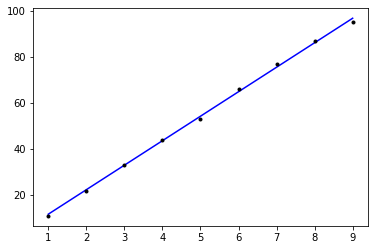

In [26]:
# 최종적으로 선택된 오차를 최소화하는 직선
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [27]:
# model.predict()은 학습이 완료된 모델이 입력된 데이터에 대해서 어떤 값을 예측하는지를 보여줌
print(model.predict([9.5]))

[[102.13764]]
